In [1]:
import sys
sys.path.append("../../script")

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from statsmodels.discrete.discrete_model import Logit

from data_preparation import *
from Logit_utils import GridScore

# Import et préparation des données

In [10]:
train = pd.read_csv("../../data/application_train_vf.csv")

In [12]:
train.columns.to_list()

['Unnamed: 0',
 'SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGI

In [2]:
dataprep = DashDataPreparation()

In [3]:
selected_vars = ['AMT_GOODS_PRICE','DAYS_LAST_PHONE_CHANGE','AMT_CREDIT','AMT_ANNUITY',
 'REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH','AMT_REQ_CREDIT_BUREAU_MON',
 'YEARS_BEGINEXPLUATATION_MEDI','YEARS_BEGINEXPLUATATION_MODE']

In [4]:
dataprep.initialize_data(selected_vars)

Variables extérieures récupérées ✅
Type des variables convertis ✅
Valeurs manquantes traitées ✅


In [5]:
train_prepared = dataprep.get_prepared_data()

Discrétisation des variables numériques en cours ... 
Variables numériques discrétisées ✅
Discrétisation des variables catégorielles en cours ... 
Variables catégorielles discrétisées ✅


In [6]:
df_train = train_prepared.iloc[:280000,:]
df_test = train_prepared.iloc[280000:,:]

# Modélisation

In [7]:
features = ['REGION_RATING_CLIENT_W_CITY', 'DAYS_CREDIT_ENDDATE_disc_int', 'RATE_DOWN_PAYMENT_disc_int', 'AMT_PAYMENT_disc_int', 'NAME_INCOME_TYPE_discret', 'OCCUPATION_TYPE_discret']

In [9]:
train_prepared

,date_mensuelle,TARGET,AMT_GOODS_PRICE_disc_int,DAYS_LAST_PHONE_CHANGE_disc_int,AMT_CREDIT_disc_int,AMT_ANNUITY_disc_int,REGION_POPULATION_RELATIVE_disc_int,DAYS_ID_PUBLISH_disc_int,AMT_REQ_CREDIT_BUREAU_MON_disc_int,YEARS_BEGINEXPLUATATION_MEDI_disc_int,YEARS_BEGINEXPLUATATION_MODE_disc_int
0,2013-01-01,0,[679500.0;4050000.0],[-1079.0;0.0],[675000.0;4050000.0],[1615.5;41778.0],[0.0;0.03],[-7197;-3094],[0.0;1.0],[0.97;1.0],[0.97;1.0]
1,2013-01-01,0,[40500.0;676278.0],[-1079.0;0.0],[45000.0;674842.5],[1615.5;41778.0],[0.0;0.03],[-3093;0],[0.0;1.0],[0.0;0.97],[0.0;0.97]
2,2013-01-01,0,[40500.0;676278.0],[-1079.0;0.0],[45000.0;674842.5],[1615.5;41778.0],[0.0;0.03],[-3093;0],[0.0;1.0],[0.97;1.0],[0.97;1.0]
3,2013-01-01,0,[679500.0;4050000.0],[-1079.0;0.0],[675000.0;4050000.0],[1615.5;41778.0],[0.03;0.07],[-7197;-3094],[0.0;1.0],[0.97;1.0],[0.97;1.0]
4,2013-01-01,0,[40500.0;676278.0],[-4292.0;-1080.0],[45000.0;674842.5],[1615.5;41778.0],[0.0;0.03],[-7197;-3094],[0.0;1.0],[0.0;0.97],[0.0;0.97]
...,...,...,...,...,...,...,...,...,...,...,...
306102,2020-12-01,0,[40500.0;676278.0],[-4292.0;-1080.0],[45000.0;674842.5],[1615.5;41778.0],[0.0;0.03],[-3093;0],[0.0;1.0],[0.97;1.0],[0.97;1.0]
306103,2020-12-01,0,[40500.0;676278.0],[-4292.0;-1080.0],[45000.0;674842.5],[1615.5;41778.0],[0.03;0.07],[-3093;0],[0.0;1.0],[0.0;0.97],[0.0;0.97]
306104,2020-12-01,0,[679500.0;4050000.0],[-1079.0;0.0],[675000.0;4050000.0],[41787.0;258025.5],[0.03;0.07],[-3093;0],[0.0;1.0],[0.97;1.0],[0.97;1.0]
306105,2020-12-01,0,[40500.0;676278.0],[-1079.0;0.0],[45000.0;674842.5],[1615.5;41778.0],[0.0;0.03],[-7197;-3094],[0.0;1.0],[0.0;0.97],[0.0;0.97]


In [16]:
reference_categories = {
    'REGION_RATING_CLIENT_W_CITY' : "un_deux",
    'DAYS_CREDIT_ENDDATE_disc_int' : "[-155271.0;-39.0]",
    'RATE_DOWN_PAYMENT_disc_int' : "[0.21;4.48]",
    'AMT_PAYMENT_disc_int' : "[149850.4;25537053.78]",
    'NAME_INCOME_TYPE_discret' : "Low_income",
    'OCCUPATION_TYPE_discret' : "high_skilled",
    'NAME_CONTRACT_TYPE' : "Revolving loans"
}

In [17]:
formula_parts = []
for var in features:
    if var in reference_categories:
        ref_category = reference_categories[var]
        formula_parts.append(f'C({var}, Treatment(reference="{ref_category}"))')

formula = 'TARGET ~ ' + ' + '.join(formula_parts)

In [18]:
model = Logit.from_formula(formula=formula, data=df_train)
logit_model = model.fit()

Optimization terminated successfully.
         Current function value: 0.261444
         Iterations 7


# Prédiction

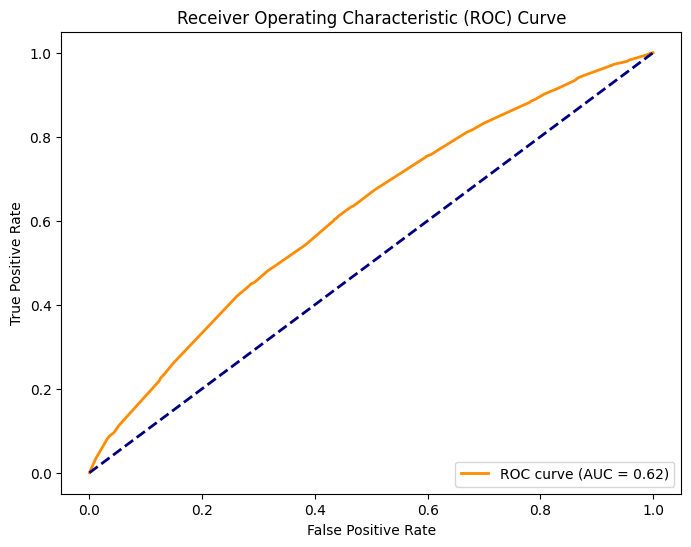

0.23375538472548918

In [19]:
pred = logit_model.predict(df_test)
fpr, tpr, thresholds = roc_curve(df_test["TARGET"],pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
roc_auc = auc(fpr, tpr)
gini_coefficient = 2 * roc_auc - 1
gini_coefficient

# Grille de score

In [20]:
GS = GridScore(train_prepared, logit_model)
grid_score = GS.compute_grid_score()

In [21]:
grid_score

,Variable,Modality,Coefficient,P-Value,Score,Contribution,Pcentage_Défaut,Pcentage_Classe
0,Intercept,-,-3.871112,0.0,0.000000,0.0,0.00,0.00
1,REGION_RATING_CLIENT_W_CITY,un_deux_ref,0.000000,0.0,200.000000,20.0,6.13,85.76
2,REGION_RATING_CLIENT_W_CITY,trois,0.470000,0.0,0.000000,20.0,1.55,14.24
3,DAYS_CREDIT_ENDDATE_disc_int,[-155271.0;-39.0]_ref,0.000000,0.0,195.744681,20.0,2.77,47.29
4,DAYS_CREDIT_ENDDATE_disc_int,[-38.0;214193.0],0.460000,0.0,0.000000,20.0,4.90,52.71
5,RATE_DOWN_PAYMENT_disc_int,[0.21;4.48]_ref,0.000000,0.0,106.382979,11.0,1.88,30.47
6,RATE_DOWN_PAYMENT_disc_int,[-0.0;0.21],0.250000,0.0,0.000000,11.0,5.79,69.53
7,AMT_PAYMENT_disc_int,[149850.4;25537053.78]_ref,0.000000,0.0,80.851064,8.0,4.78,67.70
8,AMT_PAYMENT_disc_int,[0.0;149849.5],0.190000,0.0,0.000000,8.0,2.89,32.30
9,NAME_INCOME_TYPE_discret,Low_income_ref,0.000000,0.0,234.042553,23.0,1.31,25.11


## Calcul des scores individuels

In [22]:
df_score = GS.get_individual_score()

(array([ 3869.,  5796.,   706.,  6254., 23812., 41453.,  8508., 45590.,
         9293., 43504., 21793., 31655., 14231., 13578., 16232.,  6662.,
         9385.,  2045.,   348.,  1393.]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000.]),
 <BarContainer object of 20 artists>)

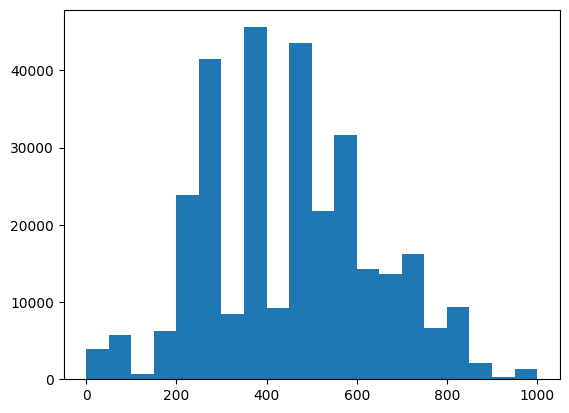

In [25]:
plt.hist(df_score["Score_ind"], bins=20)

In [27]:
df_score.to_csv("../../data/df_score.csv")

In [3]:
import pandas as pd
d = pd.read_csv("/Users/SamuelLP/Desktop/git/Challenge_Nexialog/datas/df_score.csv", index_col=[0])
d.head()

,date_mensuelle,TARGET,DAYS_CREDIT_ENDDATE_disc_int,DAYS_FIRST_DRAWING_disc_int,RATE_DOWN_PAYMENT_disc_int,AMT_PAYMENT_disc_int,AMT_CREDIT_SUM_disc_int,AMT_CREDIT_SUM_DEBT_disc_int,DAYS_EMPLOYED_disc_int,EXT_SOURCE_3_disc_int,...,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,FLAG_WORK_PHONE,FLAG_PHONE,LIVE_CITY_NOT_WORK_CITY,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CODE_GENDER,Score_ind
0,2013-01-01,0,[-31.0;214193.0],[730486.0;9131075.0],[-0.0;0.21],[143892.94;25537053.78],[1024749.0;1017957917.38],[14643.0;334498331.21],[-2423;365243],[0.32;0.9],...,trois,trois,zero,un,zero,Cash loans,Y,Y,M,671.309192
1,2013-01-01,0,[-155271.0;-32.0],[730486.0;9131075.0],[-0.0;0.21],[143892.94;25537053.78],[0.0;1024735.5],[-6981558.21;14638.5],[-17912;-2424],[0.32;0.9],...,trois,trois,zero,un,zero,Cash loans,N,Y,F,832.869081
2,2013-01-01,0,[-31.0;214193.0],[-3505.0;730484.0],[-0.0;0.21],[0.0;143891.1],[0.0;1024735.5],[14643.0;334498331.21],[-2423;365243],[0.32;0.9],...,deux,un_deux,un,zero,zero,Cash loans,Y,N,F,537.604457
3,2013-01-01,0,[-155271.0;-32.0],[-3505.0;730484.0],[-0.0;0.21],[0.0;143891.1],[0.0;1024735.5],[-6981558.21;14638.5],[-2423;365243],[0.32;0.9],...,un,un_deux,zero,zero,zero,Cash loans,Y,Y,F,626.740947
4,2013-01-01,0,[-31.0;214193.0],[-3505.0;730484.0],[-0.0;0.21],[0.0;143891.1],[0.0;1024735.5],[-6981558.21;14638.5],[-2423;365243],[0.32;0.9],...,deux,un_deux,zero,un,un,Cash loans,N,N,F,320.334262


In [4]:
d2 = pd.read_csv("/Users/SamuelLP/Desktop/git/Challenge_Nexialog/datas/df_segmentation.csv", index_col=[0])
d2.head()

,date_mensuelle,TARGET,DAYS_CREDIT_ENDDATE_disc_int,DAYS_FIRST_DRAWING_disc_int,RATE_DOWN_PAYMENT_disc_int,AMT_PAYMENT_disc_int,AMT_CREDIT_SUM_disc_int,AMT_CREDIT_SUM_DEBT_disc_int,DAYS_EMPLOYED_disc_int,EXT_SOURCE_3_disc_int,...,FLAG_WORK_PHONE,FLAG_PHONE,LIVE_CITY_NOT_WORK_CITY,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CODE_GENDER,Score_ind,date_trimestrielle,Classes
0,2013-01-01,0,[-31.0;214193.0],[730486.0;9131075.0],[-0.0;0.21],[143892.94;25537053.78],[1024749.0;1017957917.38],[14643.0;334498331.21],[-2423;365243],[0.32;0.9],...,zero,un,zero,Cash loans,Y,Y,M,671.309192,2013_1,5
1,2013-01-01,0,[-155271.0;-32.0],[730486.0;9131075.0],[-0.0;0.21],[143892.94;25537053.78],[0.0;1024735.5],[-6981558.21;14638.5],[-17912;-2424],[0.32;0.9],...,zero,un,zero,Cash loans,N,Y,F,832.869081,2013_1,6
2,2013-01-01,0,[-31.0;214193.0],[-3505.0;730484.0],[-0.0;0.21],[0.0;143891.1],[0.0;1024735.5],[14643.0;334498331.21],[-2423;365243],[0.32;0.9],...,un,zero,zero,Cash loans,Y,N,F,537.604457,2013_1,4
3,2013-01-01,0,[-155271.0;-32.0],[-3505.0;730484.0],[-0.0;0.21],[0.0;143891.1],[0.0;1024735.5],[-6981558.21;14638.5],[-2423;365243],[0.32;0.9],...,zero,zero,zero,Cash loans,Y,Y,F,626.740947,2013_1,4
4,2013-01-01,0,[-31.0;214193.0],[-3505.0;730484.0],[-0.0;0.21],[0.0;143891.1],[0.0;1024735.5],[-6981558.21;14638.5],[-2423;365243],[0.32;0.9],...,zero,un,un,Cash loans,N,N,F,320.334262,2013_1,2


In [8]:
d2.groupby("Classes")["Score_ind"].mean()

Classes
1    135.033690
2    292.740646
3    429.939686
4    560.973891
5    675.407835
6    785.849673
7    893.168765
Name: Score_ind, dtype: float64